# 0. Install and Import Dependencies

In [2]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 6.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/13.3 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 5.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/13.3 MB 1.3 MB/s eta 0:00:09
   -------- ------------------------------- 2.9/13.3 MB 1.9 MB/s eta 0:00:06
   ---------- ----------------------------- 3.4/13.3 MB 2.1 MB/s eta 0:00:05
   ---------- ----------------------------- 3.4/13.3 MB 2.1 MB/s eta 0:00:05
   ----------- ---------------------------- 3.9/13.3 MB 1.8 MB/s eta 0:00:06
   --------------- ------------------------ 5.2/13.3 MB 2.2 MB/s eta 0:00:04
   ---------------- ----------------------- 5.5/13.3 MB 2.3 MB/s eta 0:00:04
   ---

In [13]:
import pandas as pd
import prophet
from prophet import Prophet
import warnings
warnings.simplefilter('ignore')

# 1. Data Preprocessing

In [15]:
df = pd.read_csv('Downloads/dataset.csv')
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [16]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [20]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [19]:
len(df)

1080

In [21]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [30]:
df['year'] = df['Time Date'].apply(lambda x: str(x) [-4:])
df['month'] = df['Time Date'].apply(lambda x: str(x) [-6:-4])
df['day'] = df['Time Date'].apply(lambda x: str(x) [:-6])
df['ds'] = pd.DatetimeIndex(df['year']+ '-' + df['month']+ '-' +df['day'])

In [33]:
df

,Time Date,Product,Store,Value,year,month,day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531000,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000000,2018,01,5,2018-01-05
...,...,...,...,...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,12,2020-12-12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,13,2020-12-13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,2020,12,14,2020-12-14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,2020,12,15,2020-12-15


In [39]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
year                 object
month                object
day                  object
ds           datetime64[ns]
dtype: object

In [40]:
df2 = df.drop(columns=['Product', 'Store', 'Time Date', 'year', 'month', 'day'], axis=1)

In [47]:
df2.columns = ['y','ds']

In [53]:
df2

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


In [ ]:
#df[df['Product']==XYZ]

# 2. Train the Model 

In [51]:
%%timeit
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df2)

20:34:25 - cmdstanpy - INFO - Chain [1] start processing
20:34:26 - cmdstanpy - INFO - Chain [1] done processing
20:34:26 - cmdstanpy - INFO - Chain [1] start processing
20:34:26 - cmdstanpy - INFO - Chain [1] done processing
20:34:26 - cmdstanpy - INFO - Chain [1] start processing
20:34:26 - cmdstanpy - INFO - Chain [1] done processing
20:34:26 - cmdstanpy - INFO - Chain [1] start processing
20:34:27 - cmdstanpy - INFO - Chain [1] done processing
20:34:27 - cmdstanpy - INFO - Chain [1] start processing
20:34:27 - cmdstanpy - INFO - Chain [1] done processing
20:34:27 - cmdstanpy - INFO - Chain [1] start processing
20:34:27 - cmdstanpy - INFO - Chain [1] done processing
20:34:27 - cmdstanpy - INFO - Chain [1] start processing
20:34:28 - cmdstanpy - INFO - Chain [1] done processing
20:34:28 - cmdstanpy - INFO - Chain [1] start processing
20:34:28 - cmdstanpy - INFO - Chain [1] done processing


322 ms ± 6.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 3. Forecasting

In [59]:
future = m.make_future_dataframe(periods=200, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,933.898102,3931.194974,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,811.713379,3859.750999,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,663.884816,4033.631260,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,857.503682,4042.712176,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,907.591913,3957.912768,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


In [60]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1275,2021-06-30,4346.540851,4458.401625,7527.902233,4336.967336,4356.700387,1630.753087,1630.753087,1630.753087,472.568897,...,-4.423866,-4.423866,-4.423866,1162.608056,1162.608056,1162.608056,0.0,0.0,0.0,5977.293938
1276,2021-07-01,4347.627228,4381.516029,7589.293822,4337.963972,4357.853313,1650.768424,1650.768424,1650.768424,472.568897,...,22.497946,22.497946,22.497946,1155.701581,1155.701581,1155.701581,0.0,0.0,0.0,5998.395652
1277,2021-07-02,4348.713605,4328.657609,7552.195213,4338.960668,4359.006238,1588.443578,1588.443578,1588.443578,472.568897,...,-34.566066,-34.566066,-34.566066,1150.440747,1150.440747,1150.440747,0.0,0.0,0.0,5937.157183
1278,2021-07-03,4349.799982,4322.798188,7581.487396,4339.943041,4360.159164,1605.601317,1605.601317,1605.601317,472.568897,...,-14.019298,-14.019298,-14.019298,1147.051718,1147.051718,1147.051718,0.0,0.0,0.0,5955.401299
1279,2021-07-04,4350.886359,4451.135862,7493.168309,4340.879869,4361.312089,1643.448186,1643.448186,1643.448186,472.568897,...,25.187096,25.187096,25.187096,1145.692194,1145.692194,1145.692194,0.0,0.0,0.0,5994.334544


In [58]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2405.949560
1,2018-01-02,2396.511167
2,2018-01-03,2423.027170
3,2018-01-04,2470.701889
4,2018-01-05,2435.367255
...,...,...
1175,2021-03-22,3727.936966
1176,2021-03-23,3711.554148
1177,2021-03-24,3727.168702
1178,2021-03-25,3759.477383


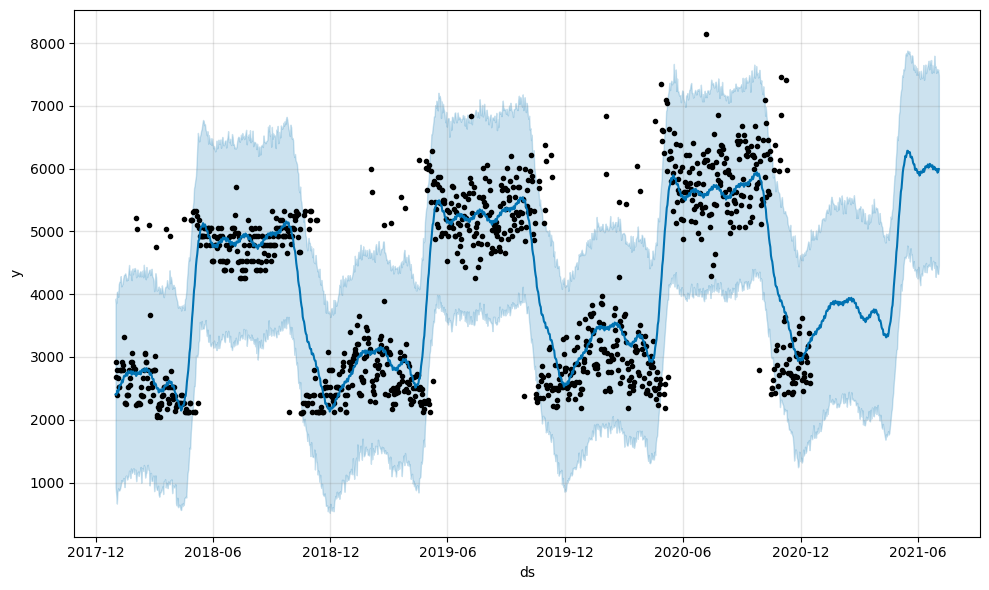

In [61]:
plot1 = m.plot(forecast)

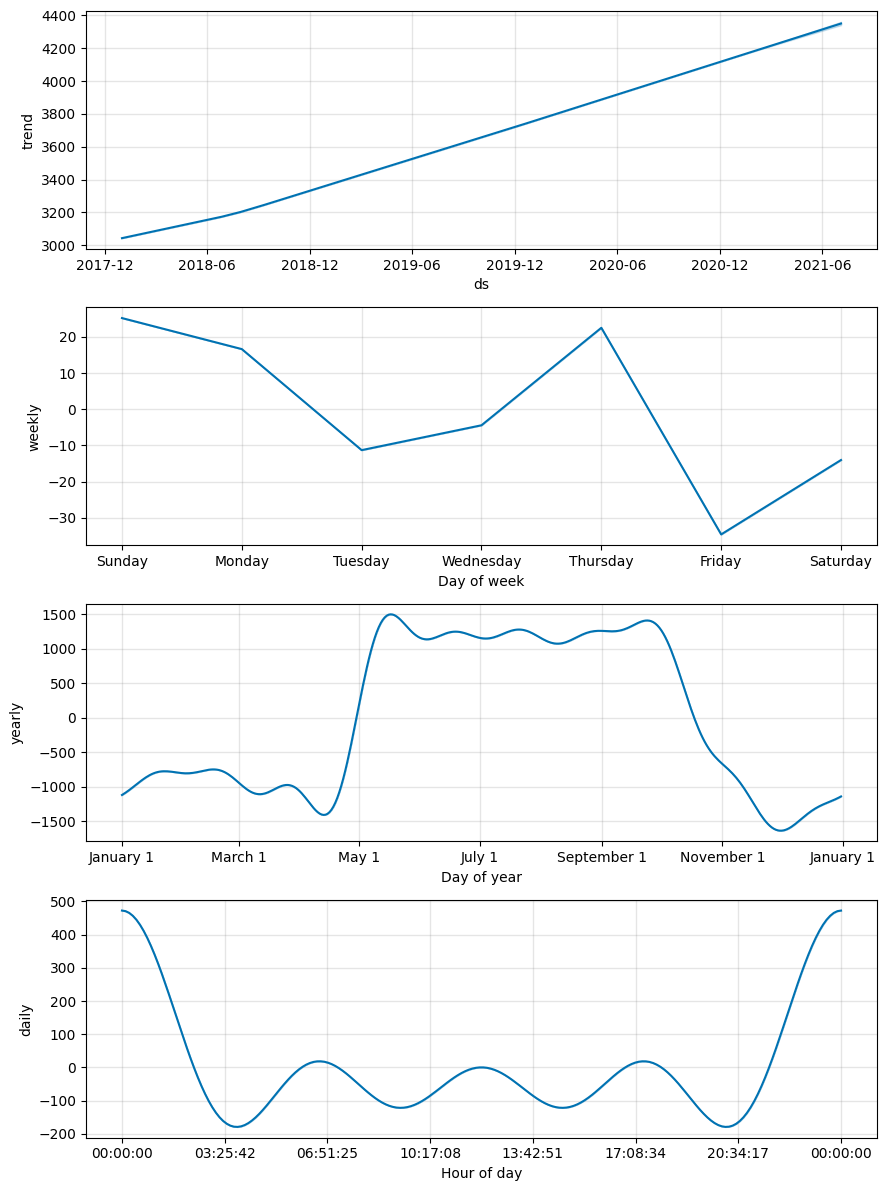

In [62]:
plot2 = m.plot_components(forecast)

# Example 2

In [63]:
import pandas as pd
from prophet import Prophet

In [65]:
df = pd.read_csv('Downloads/example_wp_log_peyton_manning.csv')

In [66]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [69]:
df.shape

(2905, 2)

In [73]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

21:23:05 - cmdstanpy - INFO - Chain [1] start processing
21:23:06 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
future = m.make_future_dataframe(periods=200, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,9.265446,7.810287,9.807763,9.265446,9.265446,-0.424608,-0.424608,-0.424608,-1.227568,...,0.352295,0.352295,0.352295,0.450665,0.450665,0.450665,0.0,0.0,0.0,8.840838
1,2007-12-11,9.263910,7.709900,9.582716,9.263910,9.263910,-0.674529,-0.674529,-0.674529,-1.227568,...,0.119632,0.119632,0.119632,0.433408,0.433408,0.433408,0.0,0.0,0.0,8.589382
2,2007-12-12,9.262375,7.491375,9.323151,9.262375,9.262375,-0.877143,-0.877143,-0.877143,-1.227568,...,-0.066660,-0.066660,-0.066660,0.417085,0.417085,0.417085,0.0,0.0,0.0,8.385231
3,2007-12-13,9.260839,7.477939,9.290603,9.260839,9.260839,-0.897697,-0.897697,-0.897697,-1.227568,...,-0.072270,-0.072270,-0.072270,0.402142,0.402142,0.402142,0.0,0.0,0.0,8.363142
4,2007-12-14,9.259303,7.459948,9.302996,9.259303,9.259303,-0.908158,-0.908158,-0.908158,-1.227568,...,-0.069573,-0.069573,-0.069573,0.388984,0.388984,0.388984,0.0,0.0,0.0,8.351145


In [75]:
forecast.shape

(3105, 22)

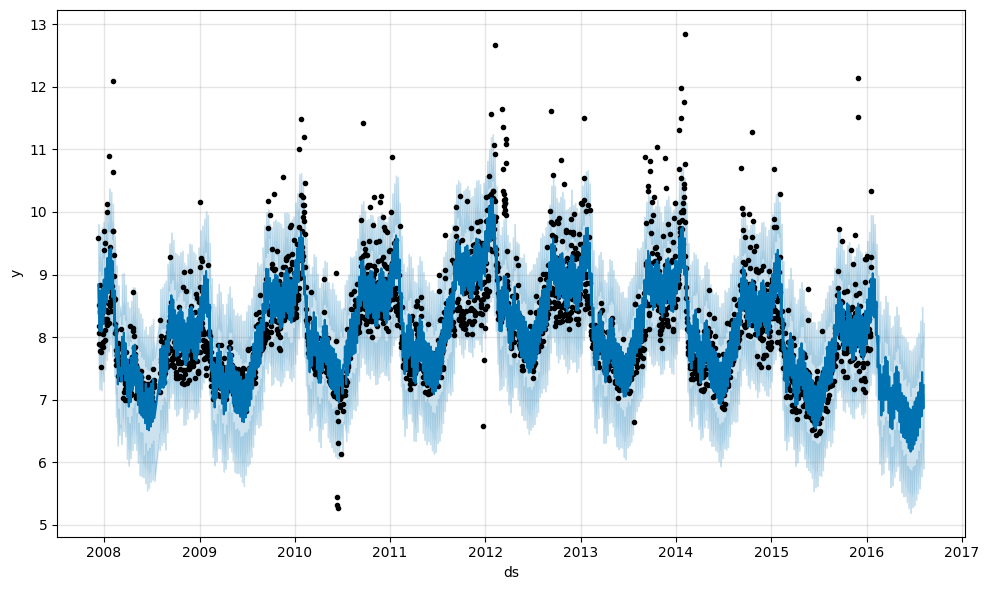

In [76]:
plot1 = m.plot(forecast)

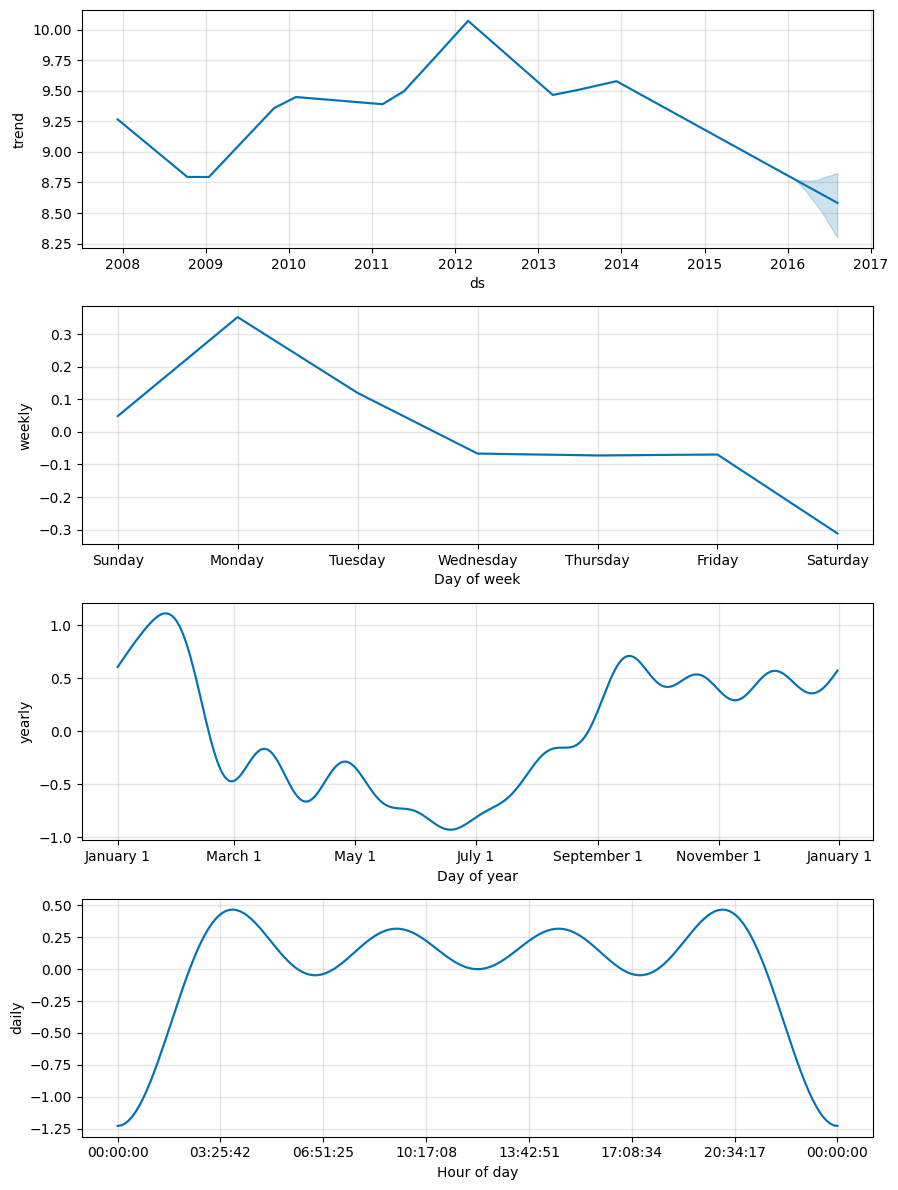

In [77]:
plot2 = m.plot_components(forecast)